In [1]:
import os
import numpy as np
from ouster import client,pcap
from pathlib import Path
from PIL import Image
from tqdm import tqdm


In [2]:
name = "The Station OS-1-128-122133000772-2048x10"
jpath = Path(name+".json")
with open(jpath.absolute(),"r") as f:
    metadata = client.SensorInfo(f.read())

In [3]:
metadata

<ouster.client.SensorInfo OS-1-128 122133000772 v2.2.1 2048x10>

In [4]:
ppath = next(Path("./").glob(f"{jpath.stem}*pcap"))

In [5]:
source = pcap.Pcap(f"{ppath.absolute()}",metadata)

In [6]:
arrpth = Path(f"./{jpath.stem}/numpy_arrays")
arrpth.mkdir(parents=True,exist_ok=True)
impth = Path(f"./{jpath.stem}/images")
impth.mkdir(parents=True,exist_ok=True)
vidpth = Path(f"./{jpath.stem}/video")
vidpth.mkdir(parents=True,exist_ok=True)

this goes throught the packets but it isn't clear from this just what data can be pulled out for spatials

In [7]:
# from tqdm import tqdm
# for i,packet in enumerate(tqdm(source)):
#     if isinstance(packet,client.LidarPacket):
        
#         np.save(f"{arrpth.absolute()}/station_packet_{i:05}.npy",packet._data)
#         im = Image.fromarray(packet._data)

the xyz values can be grabbed via this per scan


In [8]:
scans = client.Scans(source)
xyzlut = client.XYZLut(metadata)

In [9]:
r1 = np.random.random((2,200))
r2 = np.random.random((2,200))
np.vstack([r1,r2]).shape

(4, 200)

In [10]:
for i,scan in enumerate(tqdm(scans)):
    arr = xyzlut(scan.field(client.ChanField.RANGE))
    ranges_destaggered = client.destagger(source.metadata,arr)
    mi = np.min(arr)
    ma = np.max(arr)
    norm = (arr - mi)/(ma-mi)
    scaled = norm*65536
    scaled
    i16 = scaled.astype("uint16")
    largeVals = (i16>>8).astype("uint8")
    smallVals = (i16& (0xFF)).astype("uint8")
    stacked = np.vstack([largeVals,smallVals])
    im = Image.fromarray(stacked)
#     np.save(f"{arrpth.absolute()}/range_{i:05}.npy",ranges_destaggered)
    im.save(f"{impth.absolute()}/scan_stack_{i:04}.png")
   

2107it [04:42,  7.46it/s]


In [15]:
f"{4500:b}",f"{4500&0xFF:b}"



('1000110010100', '10010100')

In [74]:
limg = Image.open(f"{impth.absolute()}/scan_large_{i:04}.png")

In [80]:
simg = im
simg
sarr = np.array(simg)

In [95]:
limg
larr = np.array(limg)

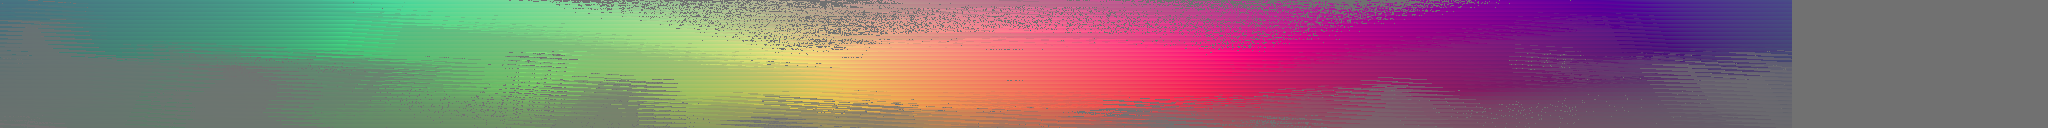

In [98]:
limg

In [100]:
larr[coord]

array([113, 113, 113], dtype=uint8)

In [96]:
l

array([113, 113, 113], dtype=uint16)

In [103]:
i

2106

In [101]:
coord =(i16.shape[0]-1,0,0)
v = i16[coord]
v
l=v>>8
s = v&0xFF
print(l,s)
print(largeVals[coord],smallVals[coord])
print(larr[coord]/256,sarr[coord]/256)
print(larr[coord] << 8 , sarr[coord])
v == (larr[coord] << 8 ) + sarr[coord]a

113 188
113 188
0.44140625 0.734375
28928 188


True

In [105]:
pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 19.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [106]:
import cv2

In [108]:
small_cap = cv2.VideoCapture(f"{vidpth.absolute()}/small_video.mp4")
large_cap  =cv2.VideoCapture(f"{vidpth.absolute()}/large_video.mp4")


In [109]:
res,smimg = small_cap.read()
res,lgimg = large_cap.read()

In [111]:
comp_arr = np.load(f"{arrpth.absolute()}/range_00000.npy")

In [112]:
comp_arr*65536

array([[[-4.96993426, -0.36766162,  1.95706145],
        [-4.97569075, -0.35274105,  1.95886469],
        [-4.98419417, -0.33797726,  1.96174988],
        ...,
        [-4.93380719, -0.4106878 ,  1.94443877],
        [-4.94713054, -0.39651505,  1.9491272 ],
        [-4.9566934 , -0.38197862,  1.95237303]],

       [[-4.96323082, -0.36617328,  1.92462048],
        [-4.96526312, -0.35101041,  1.92497624],
        [-4.97377626, -0.33627931,  1.92782232],
        ...,
        [-4.93636598, -0.40990647,  1.91572649],
        [-4.9450532 , -0.39535525,  1.91857257],
        [-4.95276571, -0.38068303,  1.92106289]],

       [[-4.95522571, -0.36632231,  1.89195304],
        [-4.96099666, -0.3514494 ,  1.89370735],
        [-4.96485438, -0.33641776,  1.89475993],
        ...,
        [-4.93391353, -0.41043709,  1.88528668],
        [-4.93981667, -0.39567233,  1.88704098],
        [-4.94474196, -0.38080323,  1.88844443]],

       ...,

       [[-0.        , -0.        , -0.        ],
        [-0

In [84]:
np.save(f"{arrpth.absolute()}/test_last.npy",i16)

In [64]:
v = -4500
l = v>>8
s = v& 0xFF
print(f"{v:016b}",f"{v:b}"[0:8],f"{v:b}"[8:])
print(np.binary_repr(v))
print(f"{v>>8 &0xFF:b}")
print(f"{v&(0xFF):b}")
num == (l << 8)+ s

-001000110010100 -1000110 010100
-1000110010100
11101110
1101100


False

In [9]:

arr = np.load(f"{arrpth.absolute()}" + "/range_00000.npy")


In [24]:
arr
mi = np.min(arr)
ma = np.max(arr)
norm = (arr - mi)/(ma-mi)
scaled = norm*65536
scaled
i16 = scaled.astype("uint16")
largeVals = i16>>8
smallVals = i16& 0xFF
smallVals


array([[[114,  20, 149],
        [102,  50, 153],
        [ 85,  80, 159],
        ...,
        [187, 188, 123],
        [160, 217, 133],
        [141, 247, 139]],

       [[127,  23,  83],
        [123,  54,  84],
        [106,  84,  89],
        ...,
        [182, 190,  65],
        [164, 219,  71],
        [149, 249,  76]],

       [[144,  23,  16],
        [132,  53,  20],
        [124,  84,  22],
        ...,
        [187, 189,   3],
        [175, 219,   6],
        [165, 249,   9]],

       ...,

       [[  1,   1,   1],
        [  1,   1,   1],
        [ 24, 188, 215],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[ 97, 170, 137],
        [132, 195, 251],
        [ 85, 194, 233],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [129, 191, 244]]

In [ ]:
import cv2
import numpy as np
arr = np.load("range_00000.npy")
arr
mi = np.min(arr)
ma = np.max(arr)
norm = (arr - mi)/(ma-mi)
scaled = norm*65536
scaled
i16 = scaled.astype("uint16")
i16
cv2.imwrite("test16.png",i16)


In [43]:
scan.field(client.ChanField.RANGE).shape

(128, 2048)

In [49]:
for i in range(1600):
    os.system(f"cp '{impth.absolute()}/test.png' '{impth.absolute()}/test_{i:04}.png'")

In [15]:
mi=np.min(ranges_destaggered)
ma = np.max(ranges_destaggered)
normalized = (ranges_destaggered -mi)/(ma - mi)

In [24]:
(normalized*255)[:,:,0]

array([[ 86.1087175 ,  86.06307604,  85.99565506, ...,  86.39515796,
         86.28952123,  86.21370022],
       [ 86.16186705,  86.14575355,  86.07825542, ...,  86.37487016,
         86.30599177,  86.2448417 ],
       [ 86.22533708,  86.179581  ,  86.14899429, ...,  86.39431486,
         86.34751064,  86.30845955],
       ...,
       [125.51380638, 125.51380638, 121.61963637, ..., 125.51380638,
        125.51380638, 125.51380638],
       [120.90682621, 122.04089881, 121.85586469, ..., 125.51380638,
        125.51380638, 125.51380638],
       [125.51380638, 125.51380638, 125.51380638, ..., 125.51380638,
        125.51380638, 122.02707775]])

In [35]:
i=Image.fromarray((normalized*255).astype("uint8"),mode="RGB")

In [36]:
i.getpixel((0,0))

(86, 122, 141)

In [37]:
i.save("test.png")

In [45]:
cmd = f'ffmpeg -y -f image2 -i "{impth.absolute()}/scan_%04d.png" "{vidpth.absolute()}/vid.mpeg"'
os.system(cmd)

ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

0